This notebook uses CSVs and dataframes produced by ortholog_census.ipynb to visualize results regarding the presence and location of pro2 genes.

In [1]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import seaborn as sns
import plotly.graph_objects as go
from plotnine import *

In [14]:
combined_df = pd.read_csv('../data/complete_only.csv', index_col=0)
display (combined_df)

,OrthologID,Genome_copies,Island_copies
0,60000015,2.777778,0.962963
1,60000028,2.592593,0.444444
2,60000046,2.333333,0.555556
3,60000126,1.222222,0.444444
4,60000600,1.000000,0.222222
...,...,...,...
87,60005258,0.111111,NaN
88,60005558,0.037037,NaN
89,60007386,0.000000,0.000000
90,60008213,0.037037,0.037037


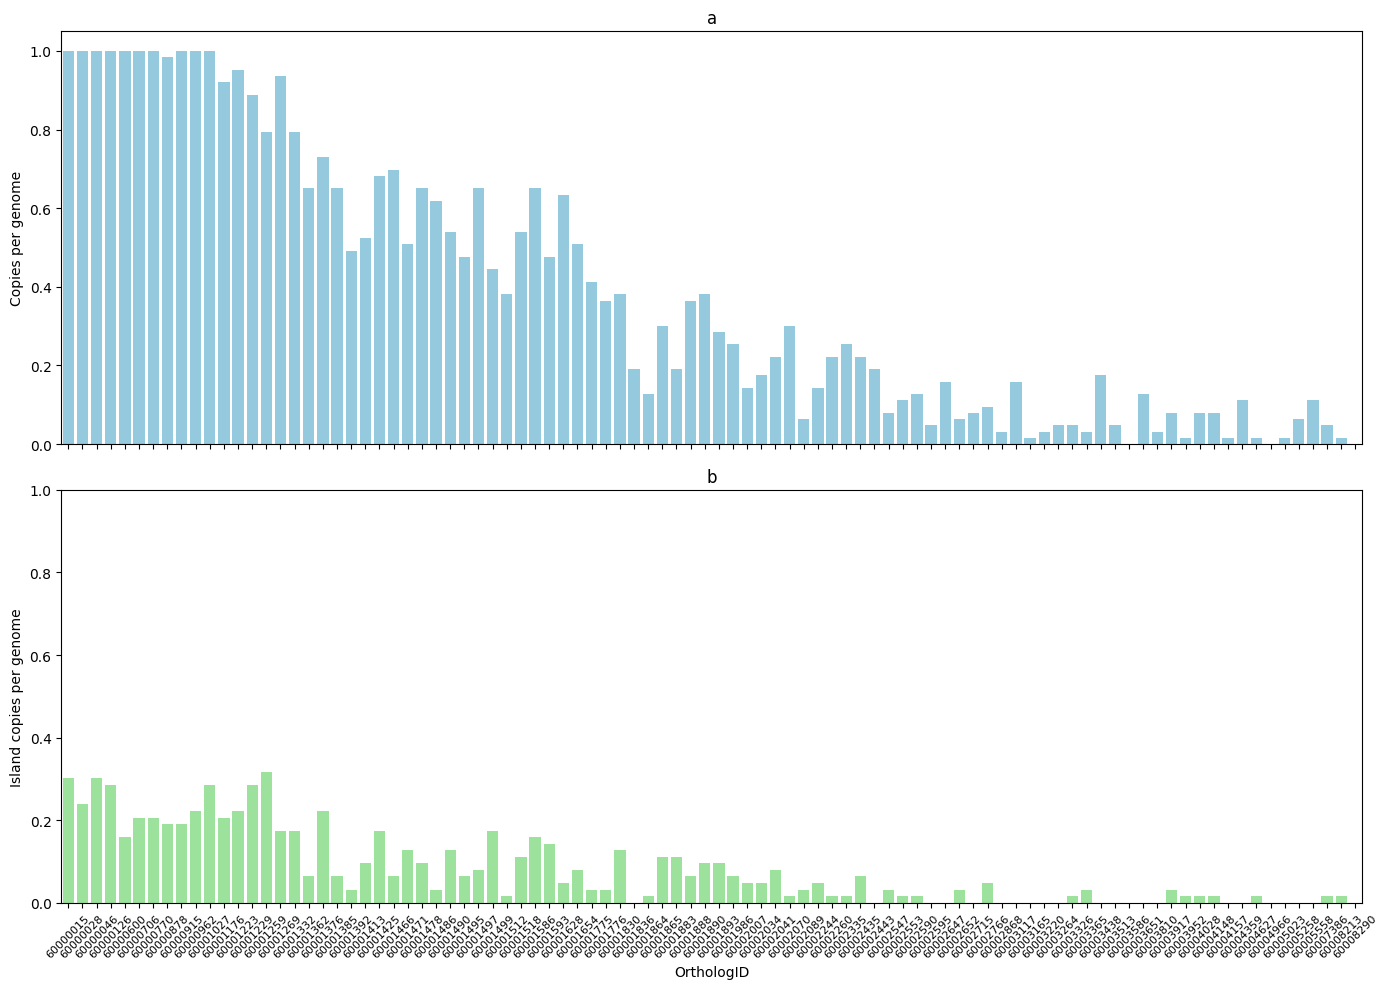

In [12]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
max_y = max(combined_df['Genome_copies'].max(), combined_df['Island_copies'].max())


# Plotting the first set of bars
sns.barplot(ax=axes[0], x='OrthologID', y='Genome_copies', data=combined_df, color='skyblue')
axes[0].set_title('a')
axes[0].set_ylabel('Copies per genome')
axes[0].tick_params(axis='x', rotation=45, labelsize=10)  # Rotate x-axis labels

# Plotting the second set of bars
sns.barplot(ax=axes[1], x='OrthologID', y='Island_copies', data=combined_df, color='lightgreen')
axes[1].set_title('b')
axes[1].set_ylabel('Island copies per genome')
axes[1].set_xlabel('OrthologID')
axes[1].tick_params(axis='x', rotation=45, labelsize=8)  # Rotate x-axis labels
axes[1].set_ylim(0, max_y)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

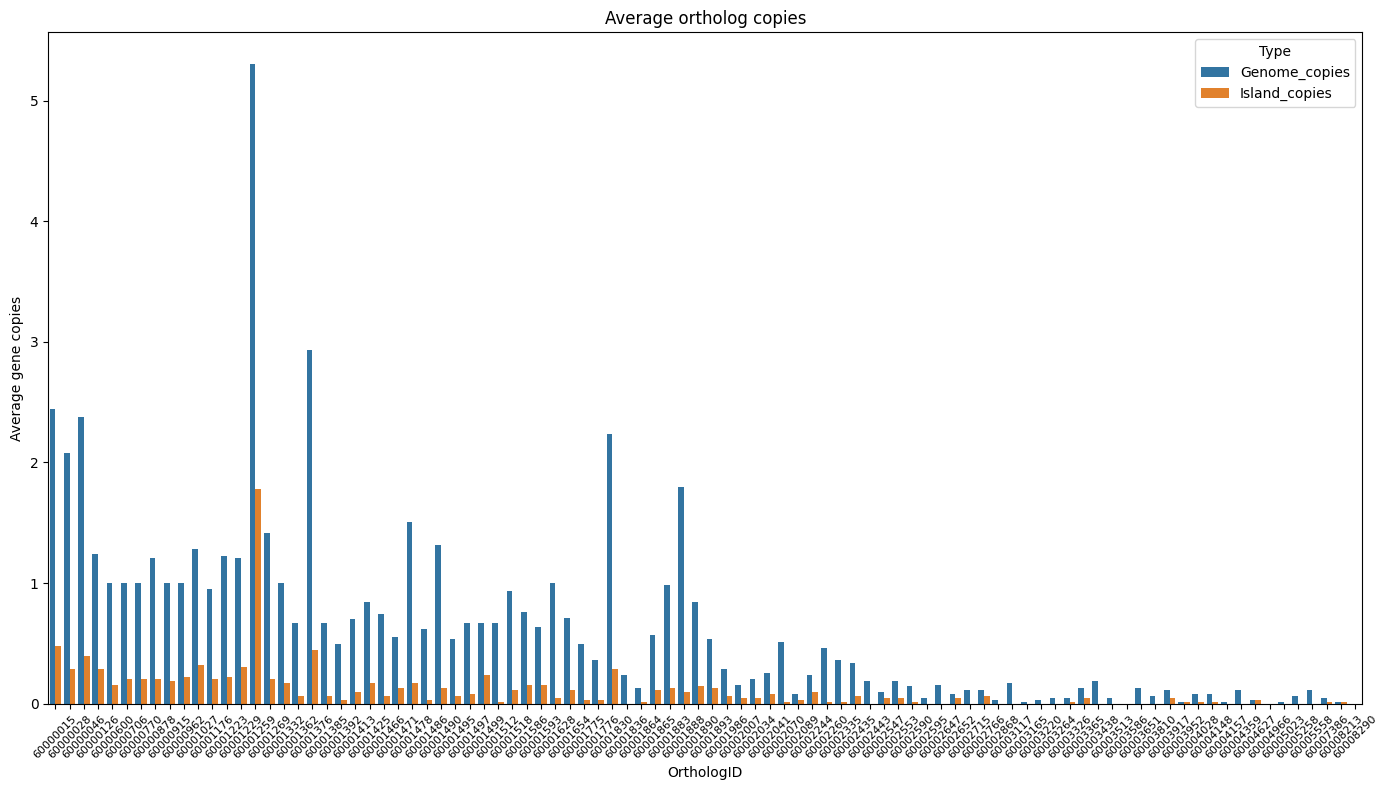

In [9]:
# Melt the DataFrame to long format
melted_df = combined_df.melt(id_vars='OrthologID', value_vars=['Genome_copies', 'Island_copies'],
                             var_name='Type', value_name='Average Overlaps')

# Plotting with seaborn
plt.figure(figsize=(14, 8))

# Create the bar plot
sns.barplot(data=melted_df, x='OrthologID', y='Average Overlaps', hue='Type')

# Adding labels and title
plt.xlabel('OrthologID')
plt.ylabel('Average gene copies')
plt.title('Average ortholog copies')
plt.xticks(rotation=45, fontsize=8)  # Rotate x-axis labels

# Show the plot
plt.tight_layout()
plt.show()

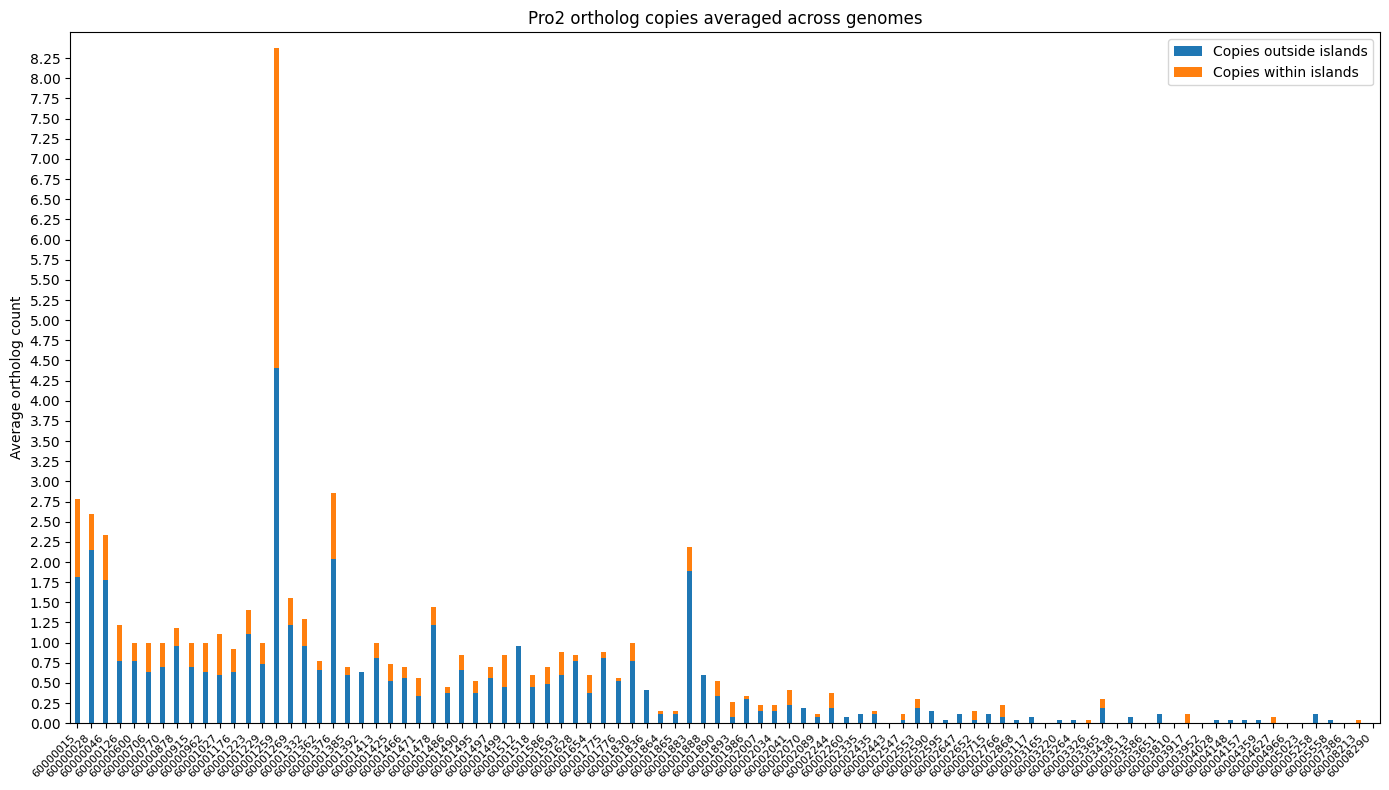

In [15]:


# Replace NaN values with 0 in 'Genome_copies' and 'Island_copies'
gen_cop = combined_df['Genome_copies'].fillna(0)
isl_cop = combined_df['Island_copies'].fillna(0)
non_island = gen_cop - isl_cop

# Extract data for plotting
N = len(combined_df)  # Number of bars
ind = np.arange(N)  # Index array for bars

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))  # Get figure and axis

width = 0.35  # Width of the bars

# Plot non_island bars
p1 = ax.bar(ind, non_island, width)

# Plot island bars stacked on non_island bars
p2 = ax.bar(ind, isl_cop, width, bottom=non_island)

# Customize plot
ax.set_ylabel('Average ortholog count')
ax.set_yticks(np.arange(0, max(gen_cop), 0.25))  # Adjust y-axis ticks
ax.set_title('Pro2 ortholog copies averaged across genomes')
ax.set_xticks(ind)
ax.set_xticklabels(combined_df['OrthologID'], rotation=45, ha='right', fontsize=8)


ax.legend((p1[0], p2[0]), ('Copies outside islands', 'Copies within islands'))

# Adjust plot limits for better fit
ax.set_xlim(-0.5, N - 0.5)  # Set x-axis limits to fit all bars
ax.set_ylim(0, max(gen_cop) + 0.2)  # Set y-axis limits with some padding

plt.tight_layout()
plt.show()


In [ ]:
# last three plots all showed the same thing, average cycog copies across genomes/islands. Next plots show distribution of cycog copies across genomes/islands.

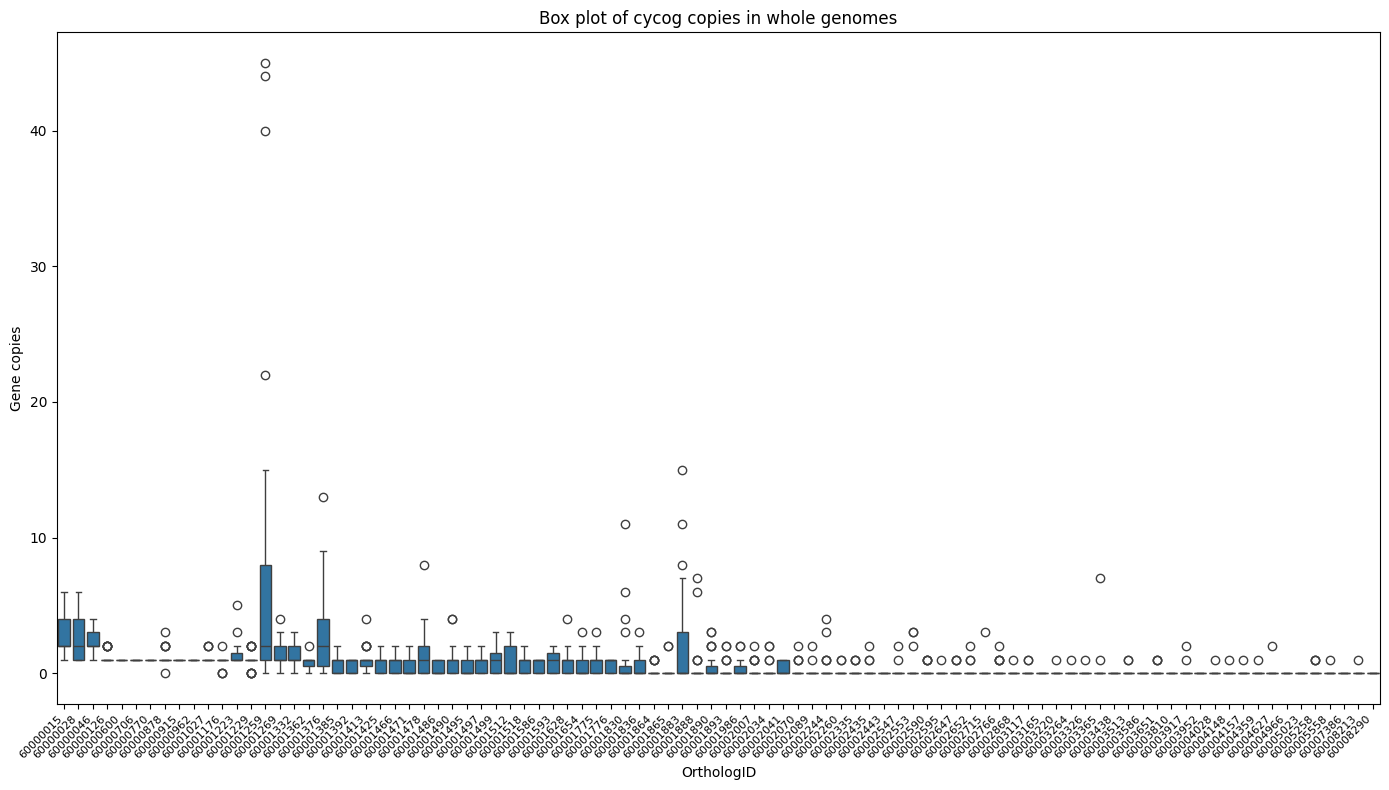

In [59]:
genome_contig_df = pd.read_csv('../data/contigs1.csv', index_col= 0)
genome_contig_df['Category'] = genome_contig_df.index
genome_contig_melted = genome_contig_df.melt(id_vars='Category', var_name='Variable', value_name='Value')

plt.figure(figsize=(14, 8))
sns.boxplot(data=genome_contig_melted, x="Category", y="Value")
plt.xlabel('OrthologID')
plt.ylabel('Gene copies')
plt.title('Box plot of cycog copies in whole genomes')
plt.xticks(rotation=45, fontsize=8, ha='right')  # Rotate x-axis labels

# Show the plot
plt.tight_layout()
plt.show()

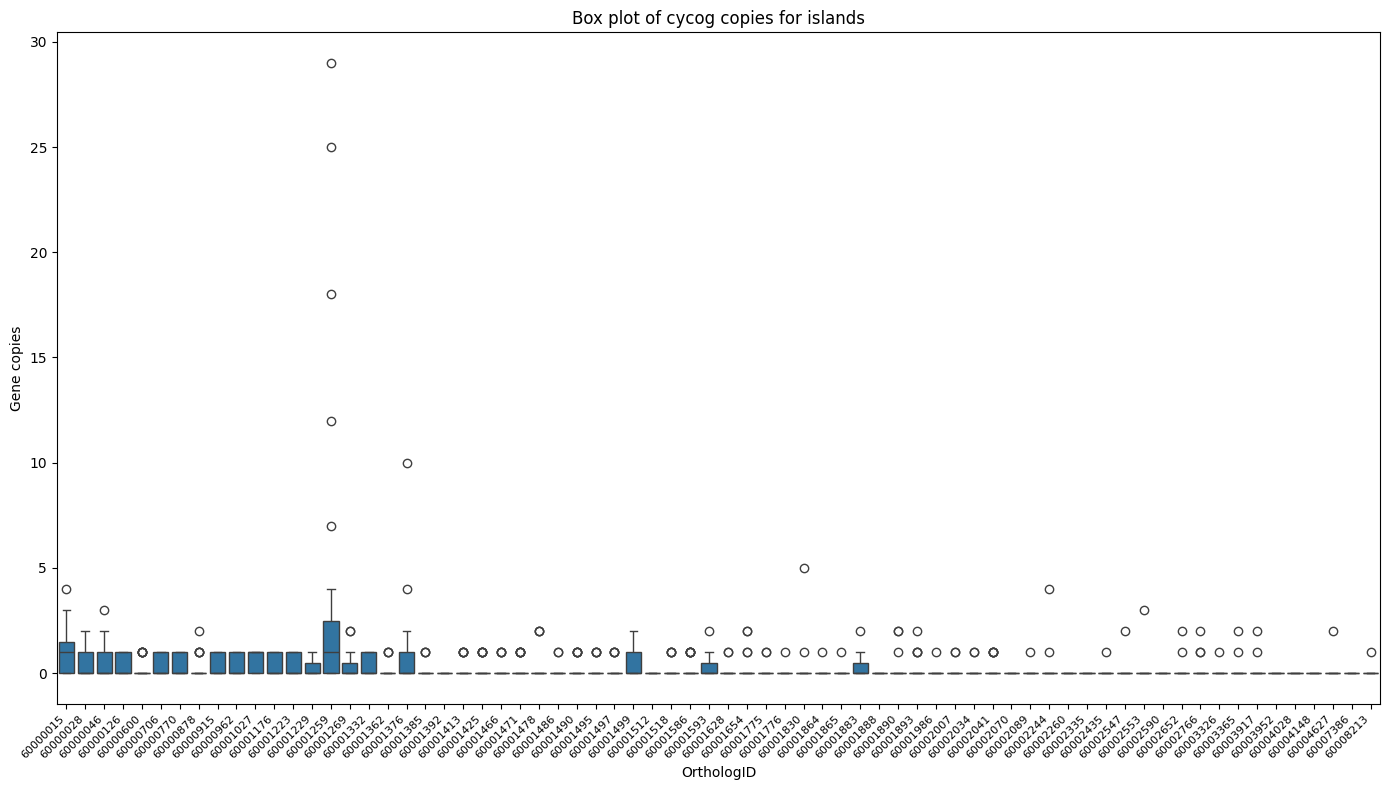

In [31]:
genome_contig_df2 = pd.read_csv('../data/contigs2.csv', index_col= 0)
genome_contig_df2['Category'] = genome_contig_df2.index
genome_contig_melted2 = genome_contig_df2.melt(id_vars='Category', var_name='Variable', value_name='Value')

plt.figure(figsize=(14, 8))
sns.boxplot(data=genome_contig_melted2, x="Category", y="Value")
plt.xlabel('OrthologID')
plt.ylabel('Gene copies')
plt.title('Box plot of cycog copies for islands')
plt.xticks(rotation=45, fontsize=8, ha='right')  # Rotate x-axis labels

# Show the plot
plt.tight_layout()
plt.show()

In [60]:
# now I flip the initial averaged dataframes, instead averaging across cycogs for each genome. 
# I make these dataframes from the loaded in data and plot them the same way the previous plots were.

In [42]:
transposed_contig_df = genome_contig_df.transpose()
transposed_contig_df = transposed_contig_df.drop(transposed_contig_df.index[27])
transposed_contig_df2 = genome_contig_df2.transpose()
transposed_contig_df2 = transposed_contig_df2.drop(transposed_contig_df2.index[27])

In [57]:
transposed_contig_melted

,Category,Variable,Value
0,AS9601,60000028,3.0
1,MED4,60000028,2.0
2,MIT0604,60000028,2.0
3,MIT0801,60000028,4.0
4,MIT0912,60000028,5.0
...,...,...,...
2479,MIT9313,60008290,0.0
2480,MIT9515,60008290,0.0
2481,NATL1A,60008290,0.0
2482,NATL2A,60008290,0.0


In [49]:
average_overlaps = transposed_contig_df.sum(axis=1)
average_overlaps = average_overlaps.sort_index()

# average_overlaps2 represents an iteration of dataframe 2
average_overlaps2 = transposed_contig_df2.sum(axis=1)
average_overlaps2 = average_overlaps2.sort_index()
average_overlaps2 = average_overlaps2.reindex(average_overlaps.index)

combined_swapped_df = pd.DataFrame({
    'Genome': average_overlaps.index,
    'Genome_copies': average_overlaps.values,
    'Island_copies': average_overlaps2.values
})
display (combined_swapped_df)

,Genome,Genome_copies,Island_copies
0,AS9601,46.0,11.0
1,MED4,43.0,15.0
2,MIT0604,71.0,29.0
3,MIT0801,97.0,25.0
4,MIT0912,58.0,4.0
5,MIT0913,56.0,8.0
6,MIT0915,64.0,15.0
7,MIT0917,96.0,22.0
8,MIT0918,35.0,6.0
9,MIT0919,43.0,16.0


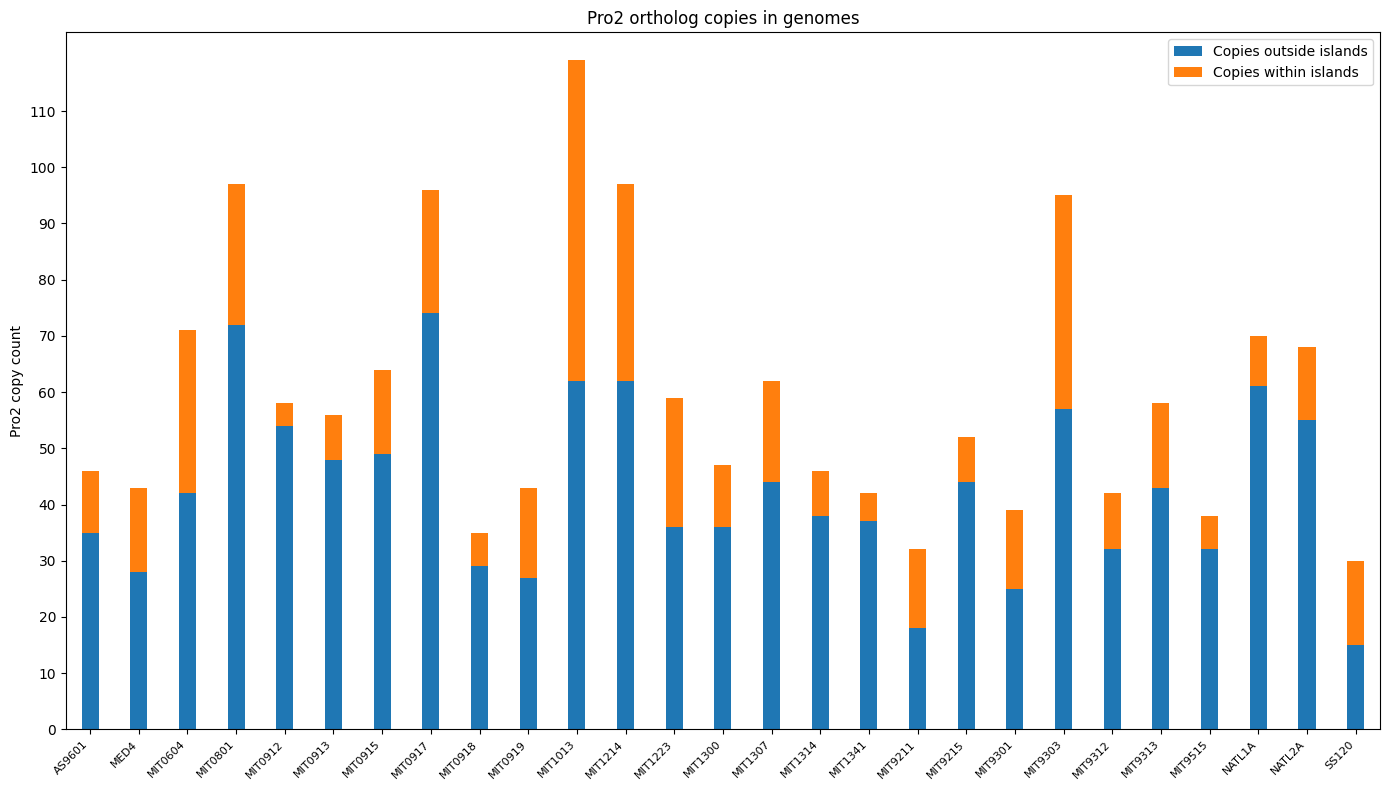

In [54]:


# Replace NaN values with 0 in 'Genome_copies' and 'Island_copies'
gen_cop = combined_swapped_df['Genome_copies'].fillna(0)
isl_cop = combined_swapped_df['Island_copies'].fillna(0)
non_island = gen_cop - isl_cop

# Extract data for plotting
N = len(combined_swapped_df)  # Number of bars
ind = np.arange(N)  # Index array for bars

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))  # Get figure and axis

width = 0.35  # Width of the bars

# Plot non_island bars
p1 = ax.bar(ind, non_island, width)

# Plot island bars stacked on non_island bars
p2 = ax.bar(ind, isl_cop, width, bottom=non_island)

# Customize plot
ax.set_ylabel('Pro2 copy count')
ax.set_yticks(np.arange(0, max(gen_cop), 10))  # Adjust y-axis ticks
ax.set_title('Pro2 ortholog copies in genomes')
ax.set_xticks(ind)
ax.set_xticklabels(combined_swapped_df['Genome'], rotation=45, ha='right', fontsize=8)


ax.legend((p1[0], p2[0]), ('Copies outside islands', 'Copies within islands'))

# Adjust plot limits for better fit
ax.set_xlim(-0.5, N - 0.5)  # Set x-axis limits to fit all bars
ax.set_ylim(0, max(gen_cop) + 5)  # Set y-axis limits with some padding

plt.tight_layout()
plt.show()


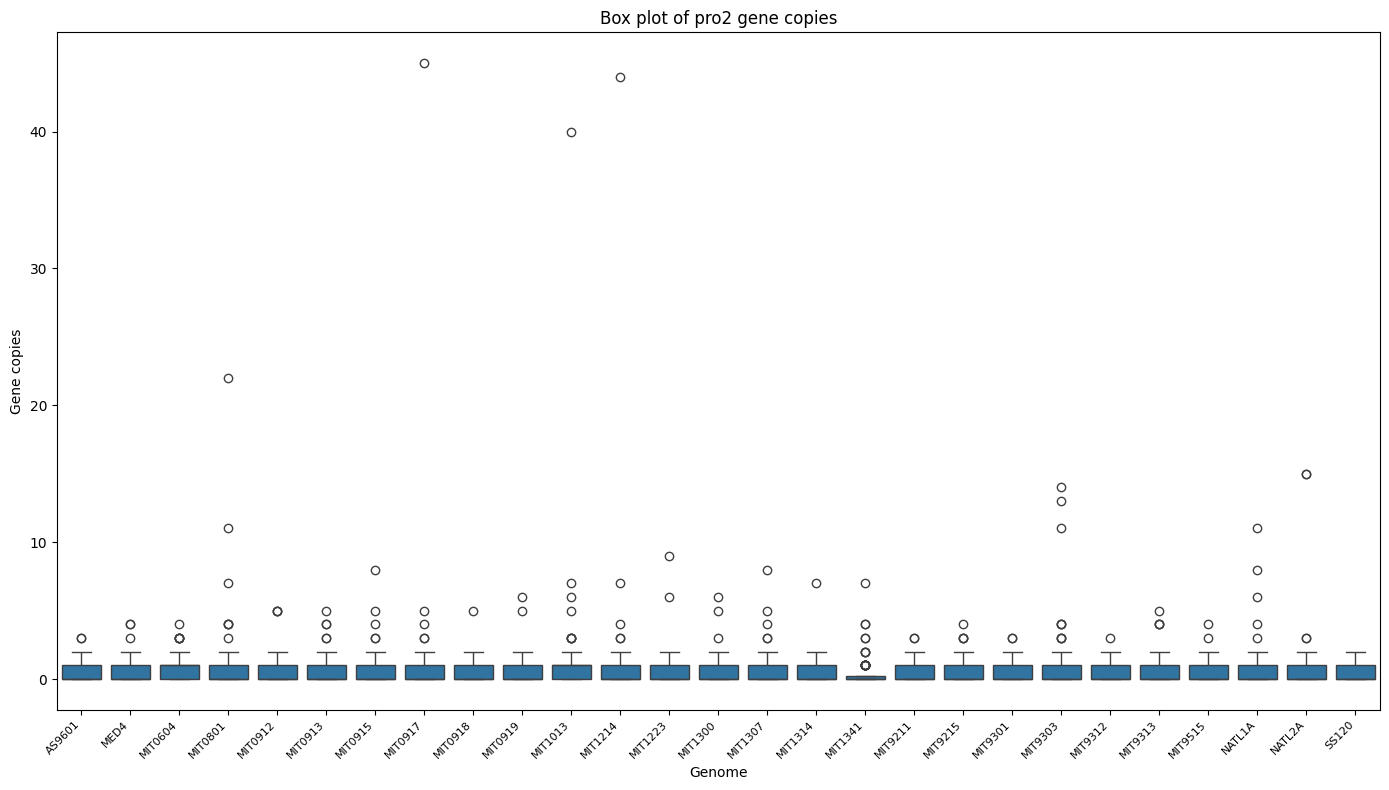

In [58]:
transposed_contig_df['Category'] = transposed_contig_df.index
transposed_contig_melted = transposed_contig_df.melt(id_vars='Category', var_name='Variable', value_name='Value')

plt.figure(figsize=(14, 8))
sns.boxplot(data=transposed_contig_melted, x="Category", y="Value")
plt.xlabel('Genome')
plt.ylabel('Gene copies')
plt.title('Box plot of pro2 gene copies')
plt.xticks(rotation=45, fontsize=8, ha='right')  # Rotate x-axis labels

# Show the plot
plt.tight_layout()
plt.show()